# QPT Benchmarking Example

This notebook demonstrates how to use the `benchmarking` package in the Toffoli-Optimization repository to perform QPT with error bounds on any quantum circuit.

In [57]:
import sys
import numpy as np
from qiskit import *
import qiskit.quantum_info as qi
sys.path.append('..')
from pyquopt import *
from benchmarking import generate_qpt_circuits, run_qpt_job, compute_fidelity, compute_fidelity_job_id, PulseGates

### Load Credentials and APIs

In [38]:
IBMQ.load_account()
provider = IBMQ.providers()[1]
backend = provider.get_backend('ibmq_jakarta')

ibmqfactory.load_account:WARNING:2022-03-12 21:12:08,297: Credentials are already in use. The existing account in the session will be replaced.


In [39]:
ss_api_key = "ya29.A0ARrdaM-If8z025dOjb7c5IjnWkp4OtiXkSWASmtad69KOjYl3PIiMiY5bb6SBPkLSh-Iv_92fhn2tHNewjinaPf0IztIrf6SxnKaoeKyqH4UN_QZgMRnnwJo613yE8NRoy2g13ScGQJQnpkYds3KfMXp5BCu0Q"
ss_host = ""  # not necessary

### Get Toffoli Gate Implementations and Unitary

In [58]:
basic_toffoli_circ = QuantumCircuit(3)
basic_toffoli_circ.ccx(0, 1, 2)

# Get the ideal Toffoli gate unitary operator
target_unitary = qi.Operator(basic_toffoli_circ)

In [59]:
target_unitary

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [40]:
gate_gen = PulseGates(backend, ss_host, ss_api_key)

In [41]:
opt_linear_toffoli = gate_gen.get_optimized_linear_toffoli(qubits=[0, 1, 3], target="ibmq_jakarta_qpu")

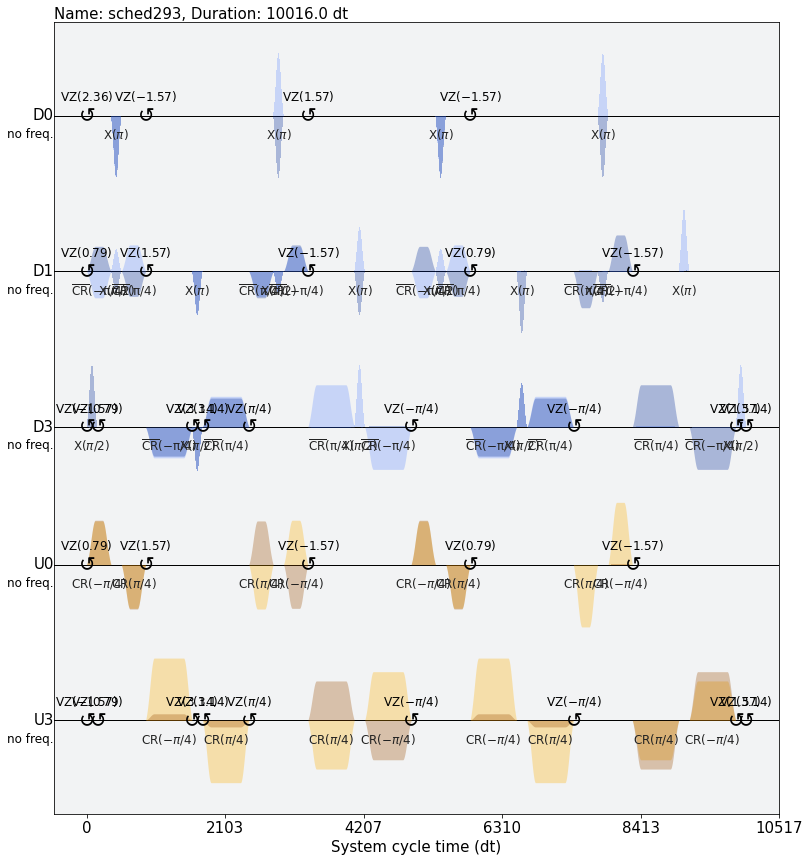

In [42]:
opt_linear_toffoli.draw()

In [43]:
canonical_linear_toffoli = gate_gen.get_canonical_linear_toffoli(qubits=[0, 1, 3])

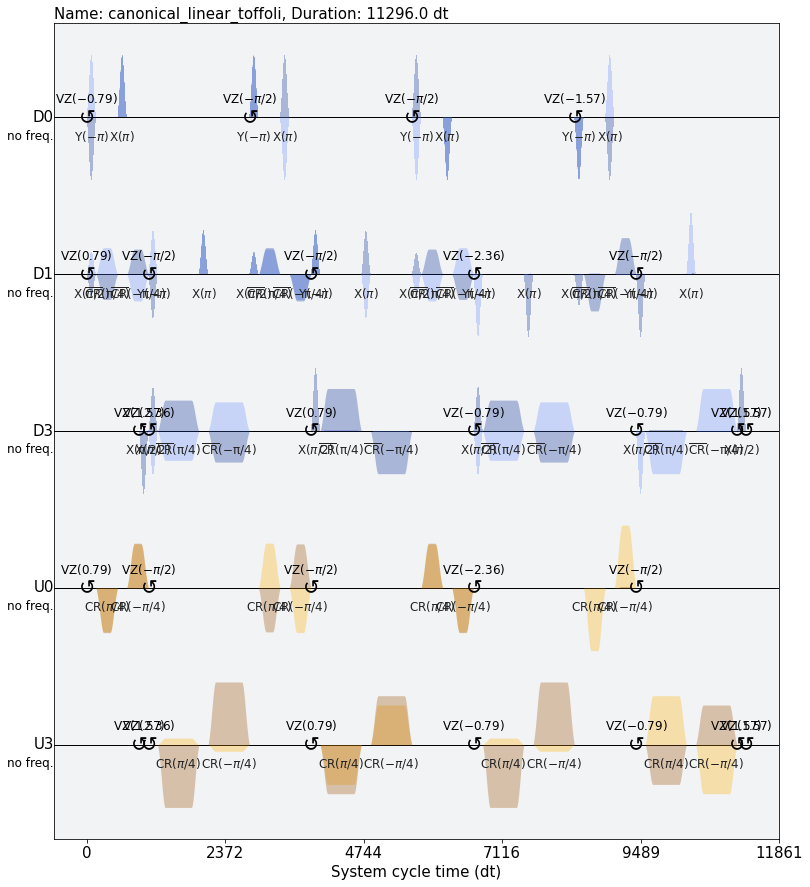

In [44]:
canonical_linear_toffoli.draw()

### Generate and Run QPT Circuits

In [45]:
circuit = QuantumCircuit(7)
circuit.ccx(0, 1, 3)

qpt_circuits = generate_qpt_circuits(circuit=circuit, qubits=[0, 1, 3], backend=backend)
transpiled_qpt_circuits = []

for qpt_circuit in qpt_circuits:
    qpt_circuit.add_calibration('ccx', [0, 1, 3], opt_linear_toffoli)
    transpiled_qpt_circuit = transpile(qpt_circuit, backend=backend)
    transpiled_qpt_circuits.append(transpiled_qpt_circuit)

In [46]:
transpiled_qpt_circuits[36].draw()

/home/maxab/anaconda3/envs/micro/lib/python3.9/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


global phase: π/2
               ░       ░    ┌────┐  ┌─────────┐           ┌─┐      
q_0 -> 0 ──────░───■───░────┤ √X ├──┤ Rz(π/2) ├───────────┤M├──────
               ░   │   ░ ┌──┴────┴─┐└──┬────┬─┘┌─────────┐└╥┘┌─┐   
q_1 -> 1 ──────░───■───░─┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├─╫─┤M├───
               ░   │   ░ └─────────┘   └────┘  └─────────┘ ║ └╥┘   
q_2 -> 2 ──────░───┼───░───────────────────────────────────╫──╫────
         ┌───┐ ░ ┌─┴─┐ ░ ┌─────────┐   ┌────┐  ┌─────────┐ ║  ║ ┌─┐
q_3 -> 3 ┤ X ├─░─┤ X ├─░─┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├─╫──╫─┤M├
         └───┘ ░ └───┘ ░ └─────────┘   └────┘  └─────────┘ ║  ║ └╥┘
q_4 -> 4 ──────░───────░───────────────────────────────────╫──╫──╫─
               ░       ░                                   ║  ║  ║ 
q_5 -> 5 ──────░───────░───────────────────────────────────╫──╫──╫─
               ░       ░                                   ║  ║  ║ 
q_6 -> 6 ──────░───────░───────────────────────────────────╫──╫──╫─
               ░       ░                                   ║  ║  ║ 
   c4: 3/══════════════════════════════════════════════════╩══╩══╩═
                                                           0  1  2

In [47]:
len(transpiled_qpt_circuits)

1728

In [50]:
job_id = run_qpt_job(qpt_circuits=transpiled_qpt_circuits, provider=provider, backend=backend, shots=8192, job_name="benchmark_test_3_12_22")

ibmqfactory.load_account:WARNING:2022-03-12 21:14:05,595: Credentials are already in use. The existing account in the session will be replaced.


In [51]:
job_id

'6781f4d9017940aa8b40abb42f973a6a-16471412481924913'

### Analyze Results

In [ ]:
avg_fidelity, error_bound = compute_fidelity_job_id(transpiled_qpt_circuits, provider, '6781f4d9017940aa8b40abb42f973a6a-16471412481924913', target_unitary, mc_trials=1000)

In [ ]:
print(f"Average fidelity is {avg_fidelity} +/- {error_bound}.")